In [ ]:
 import matplotlib.pyplot as plt

The IS-LM-PC model is a basic macroeconomic model which has replaced the AS-AD model in some newer macroeconomic textbooks. It describes the medium run by combining the IS-LM model with the Phillips curve, thus creating a relation between inflation, unemployment, the output gap, and interest rate policy. 

We define first the **variables**, **parameters** and **equations** of the IS-LM model:
* $Y$ is output (or income) 
* $C$ is consumption
* $c_0$ is the part of consumption that is independent of income
* $c_1$ is the marginal propensity to consume
* $T$ is taxes net of transfers
* $t_0$ is the part of taxes that is independent of income
* $t_1$ is the tax rate on income
* $I$ is investment
* $b_0$ is the part of investment that is independent of income and the interest rate
* $b_1$ is the income sensitivity of investment  
* $b_2$ is the interest rate sensitivity of investment
* $G$ is government spending
* $r$ is the real interest rate

$$
\begin{aligned}
Y=C+I+G\\
C=c_{0}+c_{1}*(Y-t_{0}-t_{1}Y)\\
T=t_{0}+t_{1}Y\\
I=b_{0}+b_{1}Y-b_{2}r\\
\end{aligned}
$$



########################################33
Centralbanken maksimerer $u=f\left(\pi-\pi^{*},\,u_{t}-u_{n}\right)$
(Jeg skal lige have skrevet ind at der maksimeres over renten)





$u-u_{n}=-L(Y-Y_{n})$


The central bank sets the interest rate directly, such that the real interest rate equals $r=\bar{r}$. The LM curve in this model is thus simply:

$$
\begin{aligned}
LM: r=\bar{r}\\
\end{aligned}
$$

In the following we derive the IS curve

In [16]:
y = sm.symbols('Y')
c = sm.symbols('C')
i = sm.symbols('I')
g = sm.symbols('G')
t = sm.symbols('T')
i_n = sm.symbols('i')
r = sm.symbols('r')
c0 = sm.symbols('c_0')
c1 = sm.symbols('c_1')
t0 = sm.symbols('t_0')
t1 = sm.symbols('t_1')
b0 = sm.symbols('b_0')
b1 = sm.symbols('b_1')
b2 = sm.symbols('b_2')
r_bar = sm.symbols("rbar")

eqC = sm.Eq(c, (c0+c1*(y-t0-t1*y)))
eqT = sm.Eq(t, (t0+t1*y))
eqI = sm.Eq(i, (b0+b1*y-b2*r))

eq_t = t0+t1*y
eq_c = c0+c1*y-eq_t
eq_i = b0+b1*y-b2*r
eq_y = sm.Eq(y, (eq_c+eq_i+g))

c_func = sm.lambdify((c0,c1,t0,t1,y),sm.solve(eqC,c)[0])
t_func = sm.lambdify((t0,t1,y),sm.solve(eqT,t)[0])
i_func = sm.lambdify((b0,b1,b2,r,y),sm.solve(eqI,i)[0])

y_func = sm.lambdify((c0,c1,t0,t1,b0,b1,b2,r,g),sm.solve((eq_y), y)[0])
y_solve = sm.solve((eq_y), y)[0]
y_solve

(-G - b_0 + b_2*r - c_0 + t_0)/(b_1 + c_1 - t_1 - 1)

Combining the IS curve and the LM curve gives the equilibrium level of output.

In [17]:
y_equi = y_func(c0,c1,t0,t1,b0,b1,b2,r_bar,g)
y_equi

(-G - b_0 + b_2*rbar - c_0 + t_0)/(b_1 + c_1 - t_1 - 1)

We then insert values for the parameters (and G)

In [18]:
y_num = y_func(100,0.8,100,0.4,100,0.1,10,r_bar,500)
y_num

1200.0 - 20.0*rbar

We plot this in a figure. We also plot the LM curve for $\bar{r}$ = 3. The intersection between the two curves describes the equilibrium.


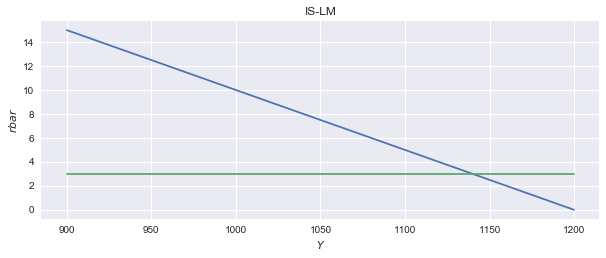

In [25]:
N = 100
 
r_vec = np.linspace(0,15,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*3 # interest rate = 3
 
for i,r_bar in enumerate(r_vec):
    r_bar = r_vec[i]
    y_vec[i] = y_func(100,0.8,100,0.4,100,0.1,10,r_bar,500)

# creates the figures
plt.style.use("seaborn")

#plt.figure()
#plt.subplot(211)
#plt.plot(y_vec,r_vec,'r',y_vec,rbar_vec,'g')

#plt.subplot(212)
#plt.plot(y_vec,pi_vec,'b')

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec)
fig_ISLM.plot(y_vec,rbar_vec)

fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$rbar$') #OBS! OBS! OBS!
fig_ISLM.grid(True)


The Phillips curve describes the relationship between the unemployment rate and inflation. We assume the following relationship:
$$
\begin{aligned}
\pi-\pi^{e}=-\alpha*(u-u_{n})\\
\end{aligned}
$$

where
* $\pi$ is inflation
* $\pi^{e}$ is expected inflation
* $u$ is the unemployment rate
* $u_n$ is the natural rate of unemployment (or NAIRU)
* $\alpha$ is some parameter describing the sensitivity of wages to the unemplyment rate

We further assume that inflation expectations are anchored, such that $\pi^{e}$ = $\bar{\pi}$. This corresponds to the *classic* or *original* Phillips curve. 

We assume a simple production function with labour as the only input, and one unit of labour producing one unit of output: 

$$
\begin{aligned}
Y=L*(1-u)\\
Y_n=L*(1-u_n)\\
\end{aligned}
$$

where $L$ is the size of the labour force, and $Y_n$ is the *potential* or *natural* level of output. 

This lets us describe the evolution of inflation as a function of the output gap:

$$
\begin{aligned}
\pi-\bar{\pi}=\frac{\alpha}{L}\left(Y-Y_{n}\right)
\end{aligned}
$$

We isolate $Y$ in this equation and plot it for given values of the labour force, anchored inflation expectation, potential output, and $\alpha$.

In [40]:
y_n = sm.symbols('Y_n')
inf = sm.symbols('pi')
inf_bar = sm.symbols('pibar')
alpha = sm.symbols('alpha')
l = sm.symbols('L')

eq_PC = sm.Eq((inf-inf_bar), ((alpha/l)*(y-y_n)))

PC_func = sm.lambdify((inf,inf_bar,alpha,l,y_n),sm.solve((eq_PC), y)[0])
PC_solve = sm.solve((eq_PC), y)[0]
PC_solve

(L*pi - L*pibar + Y_n*alpha)/alpha

In [41]:
a_ = PC_func(inf,1.75,0.5,1300,1500)
a_

2600.0*pi - 3050.0

Text(0, 0.5, '$\\pi-\\pi^e$')

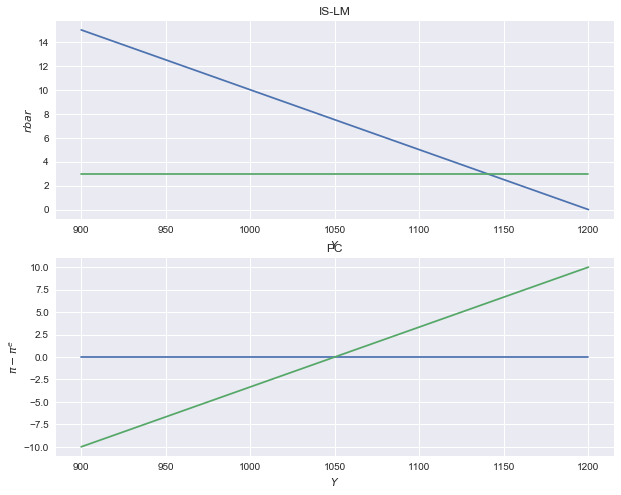

In [37]:
N = 100
 
r_vec = np.linspace(0,15,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*3 # interest rate = 3

inf_vec = np.linspace(10,-10,N)
pi_vec = np.zeros(N)
PC_vec = np.empty(N)

for i,r_bar in enumerate(r_vec):
    r_bar = r_vec[i]
    y_vec[i] = y_func(100,0.8,100,0.4,100,0.1,10,r_bar,500)

for i,inf in enumerate(inf_vec):
    inf = inf_vec[i]
    PC_vec = PC_func(inf,1.75,0.5,1300,1200)

# creates the figures
plt.style.use("seaborn")

#plt.figure()
#plt.subplot(211)
#plt.plot(y_vec,r_vec,'r',y_vec,rbar_vec,'g')

#plt.subplot(212)
#plt.plot(y_vec,pi_vec,'b')

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec)
fig_ISLM.plot(y_vec,rbar_vec)

fig_PC = fig.add_subplot(2,1,2)
fig_PC.plot(y_vec,pi_vec)
fig_PC.plot(y_vec,inf_vec)
#fig_PC.plot(y_vec,PC_vec)

fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$rbar$') #OBS! OBS! OBS!
fig_ISLM.grid(True)

fig_PC.set_title('PC')
fig_PC.set_xlabel('$Y$')
fig_PC.set_ylabel('$\pi-\pi^e$')

In [3]:
c_ = c_func(100,0.8,100,0.4,y_)
t_ = t_func(100,0.4,y_)
i_ = i_func(100,0.1,10,r_bar,y_)

print(y_, c_, t_, i__)

1200.0 - 20.0*rbar 596.0 - 9.6*rbar 580.0 - 8.0*rbar 220.0 - 12.0*rbar 80.0 - 8.0*rbar


In [5]:
# The PC curve, and the relation between the output gap and unemployment
inf = sm.symbols('pi')
inf_e = sm.symbols('pi^e')
y_n = sm.symbols('Y_n')
alpha = sm.symbols('alpha')
l = sm.symbols('L')
u = sm.symbols('u')
u_n = sm.symbols('u_n')

eq7 = sm.Eq((inf-inf_e), ((alpha/l)*(y-y_n)))
eq8 = sm.Eq((u-u_n), (-l*(y-y_n)))

inf_func = sm.lambdify((inf_e,alpha,l,y,y_n),sm.solve(eq7,inf)[0])
u_func = sm.lambdify((u_n,l,y,y_n),sm.solve(eq8,u)[0])

inf_ = inf_func(2, 0.5, 1000, y_, 1400)
u_ = u_func(4, 1000, y_, 1400)

print(inf_, u_) 

1.9 - 0.01*rbar 20000.0*rbar + 200004.0


In [6]:
eq7

Eq(pi - pi^e, alpha*(Y - Y_n)/L)